In [2]:
import matplotlib as mpl
import torch as torch
import warnings
import matplotlib
from sys import platform
import matplotlib.pyplot as plt
if platform not in ['win32', 'darwin']:
    matplotlib.use('Agg')
from helper import set_seeds

warnings.filterwarnings("ignore")

mpl.rcParams["legend.framealpha"] = 1
matplotlib.rc('font', **{'size': 15})

%load_ext autoreload
%autoreload 2

device_name = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_name)

# Visualize the data

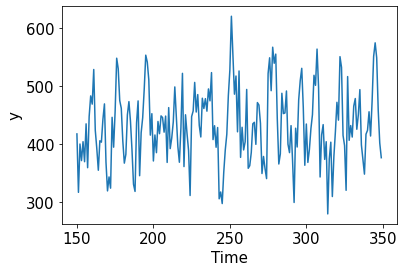

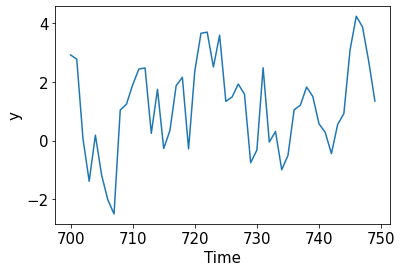

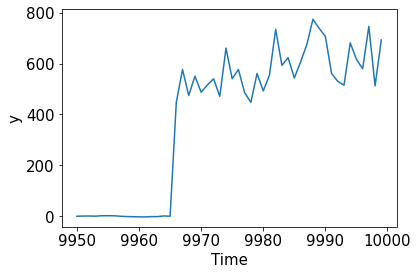

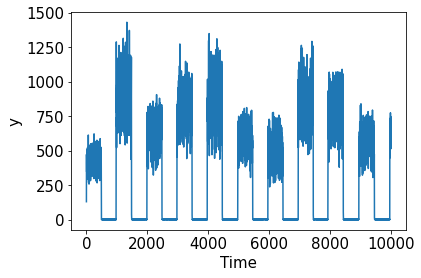

In [3]:
from datasets.datasets import  WindowSynDataGenerator
set_seeds(0)
data_generator = WindowSynDataGenerator(5, 3, 500)
x_dim = data_generator.x_dim

data_z_dim = data_generator.data_z_dim

T = 10000
z, x, y, _ = data_generator.generate_data(T, get_z=True)
x = x.to(device)
y = y.to(device)
z = z.to(device)

plt.plot(range(T)[150:350], y.cpu()[150:350])
plt.xlabel('Time')
plt.ylabel('y')
plt.show()


plt.plot(range(T)[700:750], y.cpu()[700:750])
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

plt.plot(range(T)[-50:], y.cpu()[-50:])
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

plt.plot(range(T), y.cpu())
plt.xlabel('Time')
plt.ylabel('y')
plt.show()



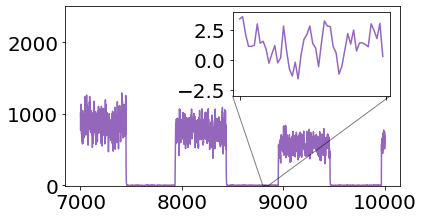

In [4]:
matplotlib.rc('font', **{'size': 20})
fig, ax = plt.subplots(figsize=(6,3.3))
y = y.cpu()
ax.plot(range(T)[7000:], y[7000:], color='tab:purple')  
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.plot(range(8800,8850), y[8800:8850], color='tab:purple') 
axins.set_xticklabels([])
ax.set_ylim(-5, 2500)
axins.set_ylim(-3, 4)
ax.indicate_inset_zoom(axins, edgecolor="black")
# plt.xlabel("Time")
plt.savefig(f"syn_data_plots/with_zoom_in.png", dpi=300,  bbox_inches='tight')
plt.show()